# Weather Data Analysis with NumPy & Matplotlib

In this exercise we analyze weather data according to different aspects and practice our plotting skills.

In [1]:
import numpy as np
import matplotlib.pyplot as pp

To display all plots inline rather than in a separate window we issue the following command.

In [2]:
%matplotlib inline

The following is where all the data for this exercise came from. We have placed the required files for this exercise into the working directory and don't need to download them again.

In [3]:
# import urllib.request
# urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt','stations.txt')

## Part 1: Parsing weather data

Let's look at the list of all available weather stations.

In [4]:
open('stations.txt','r').readlines()[:10]

['ACW00011604  17.1167  -61.7833   10.1    ST JOHNS COOLIDGE FLD                       \n',
 'ACW00011647  17.1333  -61.7833   19.2    ST JOHNS                                    \n',
 'AE000041196  25.3330   55.5170   34.0    SHARJAH INTER. AIRP            GSN     41196\n',
 'AEM00041194  25.2550   55.3640   10.4    DUBAI INTL                             41194\n',
 'AEM00041217  24.4330   54.6510   26.8    ABU DHABI INTL                         41217\n',
 'AEM00041218  24.2620   55.6090  264.9    AL AIN INTL                            41218\n',
 'AF000040930  35.3170   69.0170 3366.0    NORTH-SALANG                   GSN     40930\n',
 'AFM00040938  34.2100   62.2280  977.2    HERAT                                  40938\n',
 'AFM00040948  34.5660   69.2120 1791.3    KABUL INTL                             40948\n',
 'AFM00040990  31.5000   65.8500 1010.0    KANDAHAR AIRPORT                       40990\n']

We are interested in only the data from the Global *Climate Observing System Surface Network* (GSN), where there is a good length and quality of data records:

In [5]:
stations = {}

for line in open('stations.txt','r'):
    if 'GSN' in line:
        fields = line.split()
        
        stations[fields[0]] = ' '.join(fields[4:])

How many such weather stations are there?

In [6]:
len(stations)

994

Now let's pick out a few stations that we're going to analyze.

In [7]:
def findstation(s):
    found = {code: name for code,name in stations.items() if s in name}
    print(found)

In [8]:
findstation('LIHUE')

{'USW00022536': 'HI LIHUE WSO AP 1020.1 GSN 91165'}


In [9]:
findstation('SAN DIEGO')

{'USW00023188': 'CA SAN DIEGO LINDBERGH FLD GSN 72290'}


In [10]:
findstation('MINNEAPOLIS')

{'USW00014922': 'MN MINNEAPOLIS/ST PAUL AP GSN HCN 72658'}


In [11]:
findstation('IRKUTSK')

{'RSM00030710': 'IRKUTSK GSN 30710'}


In [12]:
datastations = {'LIHUE':'USW00022536','SAN DIEGO':'USW00023188','MINNEAPOLIS':'USW00014922','IRKUTSK':'RSM00030710'}

Here's a look at the raw data of the Lihue station in Hawaii.

In [13]:
# import urllib.request
# urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/gsn/USW00022536.dly','USW00022536.dly')

In [14]:
open('USW00022536.dly','r').readlines()[:10]

['USW00022536195002TMAX  256  0  256  0  256  0  267  0  217  0  228  0  256  0  272  0  256  0  256  0  256  0  244  0  256  0  256  0  244  0  244  0  250  0  256  0  239  0  250  0  256  0  256  0  267  0  261  0  267  0  267  0  261  0  261  0-9999   -9999   -9999   \n',
 'USW00022536195002TMIN  178  0  156  0  161  0  167  0  167  0  167  0  189  0  211  0  206  0  217  0  217  0  211  0  200  0  200  0  206  0  183  0  206  0  206  0  206  0  194  0  206  0  200  0  206  0  200  0  211  0  183  0  172  0  200  0-9999   -9999   -9999   \n',
 'USW00022536195002PRCP    0  0    0  0    0  0    0  0  737  0  406  0   36  0   38  0    0T 0    0T 0    0  0    0T 0   18  0    5  0   10  0   18  0   15  0    5  0    0T 0    0T 0   23  0   10  0    3  0   48  0    0T 0    0T 0    0T 0    5  0-9999   -9999   -9999   \n',
 'USW00022536195002SNOW    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0

The readme.txt file on NOAA's FTP server tells us how to parse this data...

In [15]:
open('readme.txt','r').readlines()[98:121]

['------------------------------\n',
 'Variable   Columns   Type\n',
 '------------------------------\n',
 'ID            1-11   Character\n',
 'YEAR         12-15   Integer\n',
 'MONTH        16-17   Integer\n',
 'ELEMENT      18-21   Character\n',
 'VALUE1       22-26   Integer\n',
 'MFLAG1       27-27   Character\n',
 'QFLAG1       28-28   Character\n',
 'SFLAG1       29-29   Character\n',
 'VALUE2       30-34   Integer\n',
 'MFLAG2       35-35   Character\n',
 'QFLAG2       36-36   Character\n',
 'SFLAG2       37-37   Character\n',
 '  .           .          .\n',
 '  .           .          .\n',
 '  .           .          .\n',
 'VALUE31    262-266   Integer\n',
 'MFLAG31    267-267   Character\n',
 'QFLAG31    268-268   Character\n',
 'SFLAG31    269-269   Character\n',
 '------------------------------\n']

...and NumPy comes with a function that helps us do just that (we don't need the ID or the flags):

In [16]:
def parsefile(filename):
    return np.genfromtxt(filename,
                         delimiter = dly_delimiter,
                         usecols = dly_usecols,
                         dtype = dly_dtype,
                         names = dly_names)

In [17]:
dly_delimiter = [11,4,2,4] + [5,1,1,1] * 31
dly_usecols = [1,2,3] + [4*i for i in range(1,32)]
dly_dtype = [np.int32,np.int32,(np.str_,4)] + [np.int32] * 31
dly_names = ['year','month','obs'] + [str(day) for day in range(1,31+1)]

In [18]:
lihue = parsefile('USW00022536.dly')

In [19]:
lihue

array([(1950, 2, 'TMAX', 256,   256,   256,   267,   217,   228,   256,   272, 256,   256,   256,   244,   256,   256,   244,   244, 250,   256,   239,   250,   256,   256,   267,   261,   267,   267,   261,   261, -9999, -9999, -9999),
       (1950, 2, 'TMIN', 178,   156,   161,   167,   167,   167,   189,   211, 206,   217,   217,   211,   200,   200,   206,   183, 206,   206,   206,   194,   206,   200,   206,   200,   211,   183,   172,   200, -9999, -9999, -9999),
       (1950, 2, 'PRCP',   0,     0,     0,     0,   737,   406,    36,    38,   0,     0,     0,     0,    18,     5,    10,    18,  15,     5,     0,     0,    23,    10,     3,    48,     0,     0,     0,     5, -9999, -9999, -9999),
       ...,
       (2019, 1, 'WSF2',  98,    89,   112,   116,    94,    54,    72,    54,  58,    54,    67,    45,    58,    72,    67,   107, 103,    81,    81,    67, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999),
       (2019, 1, 'WSF5', 125,   103,   1

Now let's unroll this data and create a record array that lists each year's observable (row) labeled by day. Note: we divide each value by 10 because the data comes in tenths of degrees C.

In [20]:
def unroll(record):
    startdate = np.datetime64('{}-{:02}'.format(record['year'],record['month']))
    dates = np.arange(startdate,startdate + np.timedelta64(1,'M'),np.timedelta64(1,'D'))
    
    rows = [(date,record[str(i+1)]/10) for i,date in enumerate(dates)]
    
    return np.array(rows,dtype=[('date','M8[D]'),('value','d')])

In [21]:
unroll(lihue[0])

array([('1950-02-01', 25.6), ('1950-02-02', 25.6), ('1950-02-03', 25.6),
       ('1950-02-04', 26.7), ('1950-02-05', 21.7), ('1950-02-06', 22.8),
       ('1950-02-07', 25.6), ('1950-02-08', 27.2), ('1950-02-09', 25.6),
       ('1950-02-10', 25.6), ('1950-02-11', 25.6), ('1950-02-12', 24.4),
       ('1950-02-13', 25.6), ('1950-02-14', 25.6), ('1950-02-15', 24.4),
       ('1950-02-16', 24.4), ('1950-02-17', 25. ), ('1950-02-18', 25.6),
       ('1950-02-19', 23.9), ('1950-02-20', 25. ), ('1950-02-21', 25.6),
       ('1950-02-22', 25.6), ('1950-02-23', 26.7), ('1950-02-24', 26.1),
       ('1950-02-25', 26.7), ('1950-02-26', 26.7), ('1950-02-27', 26.1),
       ('1950-02-28', 26.1)], dtype=[('date', '<M8[D]'), ('value', '<f8')])

We get the same observable from each year by concatenating the relevant rows.

In [22]:
def getobs(filename,obs):
    return np.concatenate([unroll(row) for row in parsefile(filename) if row[2] == obs])

In [23]:
getobs('USW00022536.dly','TMIN')

array([('1950-02-01',   17.8), ('1950-02-02',   15.6),
       ('1950-02-03',   16.1), ..., ('2019-01-29', -999.9),
       ('2019-01-30', -999.9), ('2019-01-31', -999.9)],
      dtype=[('date', '<M8[D]'), ('value', '<f8')])

## Part 2: Plotting daily records and calculating means

Say we're interested in the daily max. and min. temperatures in Lihue.

In [24]:
lihue_tmax = getobs('USW00022536.dly','TMAX')
lihue_tmin = getobs('USW00022536.dly','TMIN')

We try to plot them.

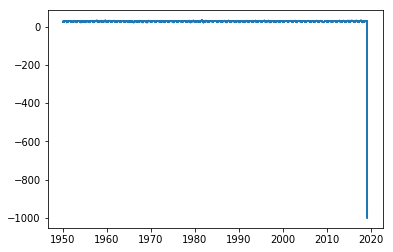

In [25]:
pp.plot(lihue_tmax['date'],lihue_tmax['value'])

NOAA lists missing data with the -999.9 value which messes up our graph. So we replace these arbitrary values with the NaN ("not a number") datatype and try again.

In [26]:
def getobs(filename,obs):
    data = np.concatenate([unroll(row) for row in parsefile(filename) if row[2] == obs])
    
    data['value'][data['value'] == -999.9] = np.nan
    
    return data

In [27]:
lihue_tmax = getobs('USW00022536.dly','TMAX')
lihue_tmin = getobs('USW00022536.dly','TMIN')

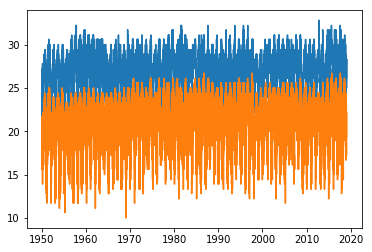

In [28]:
pp.plot(lihue_tmax['date'],lihue_tmax['value'])
pp.plot(lihue_tmin['date'],lihue_tmin['value'])

However, when trying to calculate the mean we are now stumped.

In [29]:
np.mean(lihue_tmin['value']), np.mean(lihue_tmax['value'])

(nan, nan)

In order to make calculations with our values, we'll have to replace -999.9 with something better than NaN. To do so, we use linear interpolation. Here a refresher:

[0, 8, 0, 12]

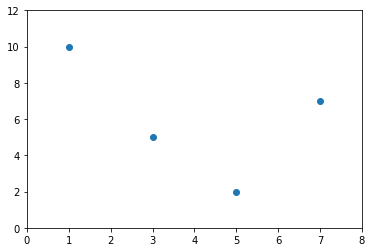

In [30]:
x = np.array([1,3,5,7],'d')
y = np.array([10,5,2,7],'d')

pp.plot(x,y,'o')

pp.axis([0,8,0,12])

In order to fill in the gaps between the given points, we create a linear space consisting of (default=50) sample points over the desired interval and use NumPy's linear interpolation function.

In [31]:
xs = np.linspace(1,7)

In [32]:
ys = np.interp(xs,x,y)

[0, 8, 0, 12]

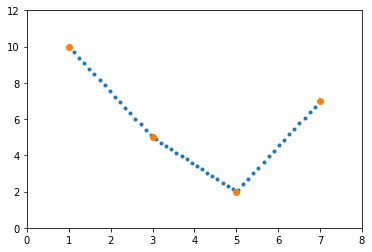

In [33]:
pp.plot(xs,ys,'.')
pp.plot(x,y,'o')

pp.axis([0,8,0,12])

So let's write a function that does this with our data whenever there is an occurrence of NaN. Note that we first need to convert our dates to floating point numbers so that NumPy can do arithmetic with them and that '~' is negation.

In [34]:
def fillnans(data):
    dates_float = data['date'].astype(np.float64)
    
    nan = np.isnan(data['value'])
    
    data['value'][nan] = np.interp(dates_float[nan],dates_float[~nan],data['value'][~nan])

In [35]:
fillnans(lihue_tmax)
fillnans(lihue_tmin)

We recalculate the mean temperatures and find that Lihue is a very nice place to live year-round:

In [36]:
np.mean(lihue_tmin['value']), np.mean(lihue_tmax['value'])

(21.0768153321165, 27.323740179350846)

## Part 3: Cleaning up noisy data

Here's the plot again. Notice how noisy the data is.

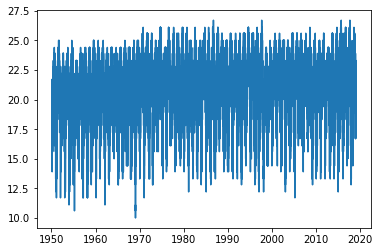

In [37]:
pp.plot(lihue_tmin['date'],lihue_tmin['value'])

Let's smoothe the data using correlation from signal processing theory. The "window" (variable 'win') determines how much smoothing will occur.

In [38]:
def plot_smoothed(data,win=10):
    smoothed = np.correlate(data['value'],np.ones(win)/win,'same')
    
    pp.plot(data['date'],smoothed,label=str(win))

We also zoom in on a few years to better see what's going on.

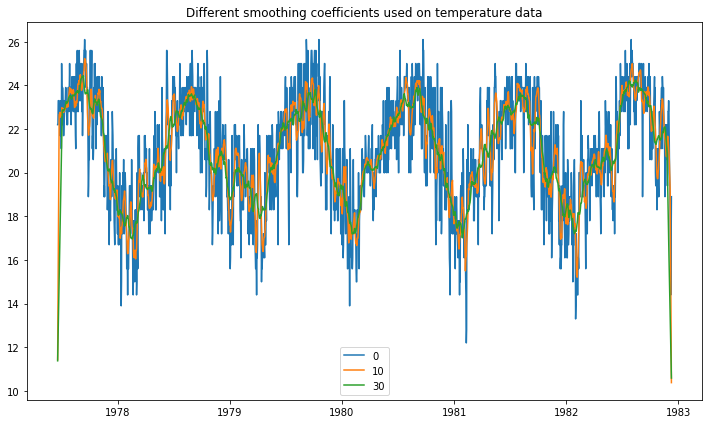

In [39]:
pp.figure(figsize=(10,6))
pp.plot(lihue_tmin[10000:12000]['date'],lihue_tmin[10000:12000]['value'],label='0')
plot_smoothed(lihue_tmin[10000:12000])
plot_smoothed(lihue_tmin[10000:12000],30)
pp.legend()
pp.title('Different smoothing coefficients used on temperature data')
pp.tight_layout()

Notice how the edges of our graph are collapsing because linear interpolation fails when a neighbor is missing.

OK, now lets's compare min. and max. daily temperatures from 1952 until 2018 from all four weather stations we downloaded.

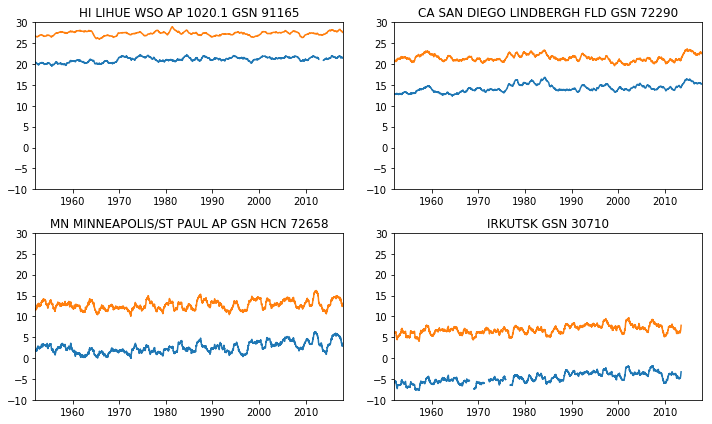

In [40]:
pp.figure(figsize=(10,6))

for i,code in enumerate(datastations.values()):
    pp.subplot(2,2,i+1)
    
    plot_smoothed(getobs('{}.dly'.format(code),'TMIN'),365)
    plot_smoothed(getobs('{}.dly'.format(code),'TMAX'),365)
    
    pp.title(stations[code])
    pp.axis(xmin=np.datetime64('1952'),xmax=np.datetime64('2018'),ymin=-10,ymax=30)

pp.tight_layout()

Note how Irkutsk stopped reporting after 2013. What happened?

## Part 4: Highest and lowest temperatures on record

Next, let's see how we would find the highest or lowest temperature ever measured on a given day. A function that picks out all the data values for one given year only will come in handy. We do this with Boolean indexing.

In [41]:
def selectyear(data,year):
    start = np.datetime64('{}'.format(year))
    end = start + np.timedelta64(1,'Y')
    
    return data[(data['date'] >= start) & (data['date'] < end)]['value']

In [42]:
selectyear(lihue_tmin,1951)

array([17.8, 17.8, 17.2, 18.3, 20. , 21.7, 22.2, 21.7, 22.2, 22.2, 21.7,
       21.7, 19.4, 18.9, 18.3, 18.3, 19.4, 20.6, 16.7, 14.4, 14.4, 17.2,
       15. , 12.8, 14.4, 13.3, 15. , 14.4, 17.8, 18.3, 16.7, 16.7, 17.2,
       16.7, 17.8, 14.4, 12.2, 13.3, 13.9, 12.8, 14.4, 14.4, 18.9, 19.4,
       20. , 18.3, 18.3, 18.9, 20. , 18.3, 19.4, 13.3, 11.7, 17.8, 17.2,
       17.8, 21.1, 22.2, 20.6, 22.2, 19.4, 20. , 18.3, 17.8, 17.8, 17.2,
       16.1, 18.9, 18.9, 18.9, 17.8, 16.7, 15.6, 13.3, 13.9, 15.6, 15.6,
       21.7, 20.6, 18.3, 15.6, 14.4, 17.2, 17.8, 18.9, 20. , 18.9, 18.3,
       18.3, 20.6, 20. , 18.9, 18.3, 21.1, 16.7, 21.7, 21.1, 21.7, 17.2,
       16.7, 17.8, 18.3, 16.1, 19.4, 20.6, 18.3, 18.3, 17.2, 18.9, 21.7,
       21.7, 21.7, 21.1, 20.6, 20.6, 20. , 21.7, 20. , 20. , 19.4, 18.3,
       21.7, 22.2, 22.8, 20. , 19.4, 17.2, 22.2, 22.8, 22.8, 22.8, 18.9,
       17.8, 18.3, 19.4, 22.8, 22.2, 22.2, 20.6, 21.1, 21.1, 22.8, 19.4,
       19.4, 20.6, 21.7, 23.3, 23.3, 22.2, 22.2, 23

We then stack all the years into one 2D-array, ignoring the beginning and end years where linear interpolation skews our data.

In [43]:
lihue_tmin_all = np.vstack([selectyear(lihue_tmin,year)[:365] for year in range(1951,2018+1)])

In [44]:
lihue_tmin_all

array([[17.8, 17.8, 17.2, ..., 20.6, 19.4, 18.9],
       [17.2, 19.4, 21.7, ..., 21.7, 20.6, 17.8],
       [17.8, 18.3, 19.4, ..., 13.3, 15. , 15. ],
       ...,
       [15.6, 15.6, 16.7, ..., 21.1, 20. , 18.9],
       [17.8, 17.8, 16.1, ..., 20. , 16.7, 21.1],
       [18.3, 18.9, 22.2, ..., 22.2, 22.2, 22.2]])

After a sanity check we can use NumPy's min and max functions to determine the lowest and highest minium temperature ever measured on a particular day of the year.

In [45]:
lihue_tmin_all.shape

(68, 365)

In [46]:
lihue_tmin_recordmin = np.min(lihue_tmin_all,axis=0)
lihue_tmin_recordmax = np.max(lihue_tmin_all,axis=0)

In [47]:
lihue_tmin_recordmax

array([23.3, 23.3, 23.3, 22.8, 23.9, 22.8, 24.4, 23.3, 23.3, 23.3, 23.9,
       23.3, 22.8, 23.9, 22.8, 23.9, 23.9, 23.3, 22.8, 22.8, 23.3, 23.3,
       23.3, 22.8, 23.3, 22.8, 23.3, 23.9, 23.9, 22.8, 23.3, 22.2, 22.2,
       22.2, 22.8, 23.3, 22.8, 22.2, 22.8, 22.8, 22.8, 22.8, 23.3, 22.2,
       23.3, 23.3, 22.8, 23.3, 22.8, 22.8, 22.8, 22.8, 23.3, 22.2, 23.3,
       23.3, 23.3, 22.8, 22.8, 22.8, 22.8, 22.2, 22.8, 22.8, 22.8, 22.8,
       22.8, 22.8, 22.2, 22.8, 22.8, 23.3, 22.8, 23.3, 22.8, 23.3, 22.2,
       23.3, 22.8, 23.9, 22.8, 23.9, 23.3, 23.9, 23.3, 23.9, 23.3, 22.8,
       23.3, 23.3, 23.3, 23.3, 22.8, 24.4, 22.8, 22.8, 23.3, 23.3, 22.8,
       23.9, 23.3, 23.3, 23.3, 23.3, 23.9, 22.8, 23.3, 23.3, 23.9, 23.9,
       23.9, 23.3, 23.9, 24.4, 23.9, 23.9, 24.4, 23.3, 25.6, 23.9, 23.3,
       23.9, 23.3, 24.4, 23.9, 24.4, 23.9, 23.3, 23.3, 23.9, 23.9, 23.9,
       24.4, 25. , 24.4, 24.4, 24.4, 24.4, 24.4, 24.4, 23.9, 23.9, 24.4,
       24.4, 24.4, 23.9, 24.4, 25. , 24.4, 24.4, 25

And what was the coldest day ever on record?

In [48]:
np.min(lihue_tmin_recordmin)

10.0

Plotting our daily records, we notice that the graph has a strange appearance.

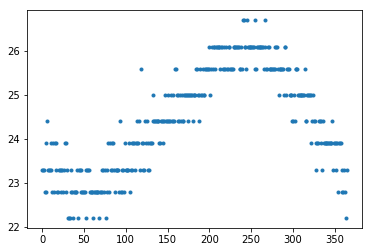

In [49]:
pp.plot(lihue_tmin_recordmax,'.')

The reason for this appearance is that the original data only has a discrete temperature resolution (jumps in units of .5 degrees).

Finally, we show how the year 2018 compares to the highest/lowest ever min. temperatures and the highest/lowest ever max. temperatures using the fill_between method.

In [50]:
lihue_tmax_all = np.vstack([selectyear(lihue_tmax,year)[:365] for year in range(1951,2018+1)])

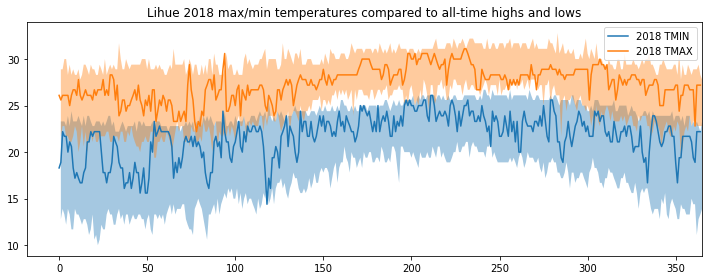

In [51]:
pp.figure(figsize=(10,4))

days = np.arange(1,365+1)

pp.fill_between(days,np.min(lihue_tmin_all,axis=0),np.max(lihue_tmin_all,axis=0),alpha=0.4)
pp.plot(selectyear(lihue_tmin,2018), label='2018 TMIN')

pp.fill_between(days,np.min(lihue_tmax_all,axis=0),np.max(lihue_tmax_all,axis=0),alpha=0.4)
pp.plot(selectyear(lihue_tmax,2018), label='2018 TMAX')

pp.axis(xmax=365)
pp.title('Lihue 2018 max/min temperatures compared to all-time highs and lows')
pp.legend()
pp.tight_layout()

## Part 5: Finding unusually warm or cold years

As a last demonstration, we will find the year with the highest mean max. temperature in Minneapolis and plot it agains the year with the lowest mean min. temperature in San Diego. We begin by loading the data.

In [52]:
minneapolis_tmax = getobs('{}.dly'.format(datastations['MINNEAPOLIS']),'TMAX')
minneapolis_tmin = getobs('{}.dly'.format(datastations['MINNEAPOLIS']),'TMIN')
sandiego_tmax = getobs('{}.dly'.format(datastations['SAN DIEGO']),'TMAX')
sandiego_tmin = getobs('{}.dly'.format(datastations['SAN DIEGO']),'TMIN')

As before, we linearly interpolate the data to replace any missing datapoints.

In [53]:
fillnans(minneapolis_tmax)
fillnans(minneapolis_tmin)
fillnans(sandiego_tmax)
fillnans(sandiego_tmin)

We define a function that yields the mean temperature by year...

In [54]:
def mean_temp(data):
    years = sorted(list({ str(date)[:4] for date in data['date'] }))
    
    means = [ (year, np.mean(selectyear(data,year))) for year in years[1:-1] ]
    
    return np.array(means,dtype=[('year','M8[Y]'),('value','d')])

In [55]:
minneapolis_mean_tmax_by_year = mean_temp(minneapolis_tmax)

In [56]:
sandiego_mean_tmin_by_year = mean_temp(sandiego_tmin)

In [57]:
minneapolis_mean_tmax_by_year

array([('1939', 13.74712329), ('1940', 11.8068306 ),
       ('1941', 13.82547945), ('1942', 12.75561644),
       ('1943', 11.87452055), ('1944', 13.08169399),
       ('1945', 11.6430137 ), ('1946', 13.43260274),
       ('1947', 12.54328767), ('1948', 13.31857923),
       ('1949', 13.54219178), ('1950', 10.8569863 ),
       ('1951', 10.44876712), ('1952', 12.75846995),
       ('1953', 13.64356164), ('1954', 12.78493151),
       ('1955', 12.96191781), ('1956', 12.62131148),
       ('1957', 12.49863014), ('1958', 13.10438356),
       ('1959', 12.94986301), ('1960', 12.15218579),
       ('1961', 12.48767123), ('1962', 11.22136986),
       ('1963', 12.85616438), ('1964', 13.2715847 ),
       ('1965', 11.0890411 ), ('1966', 11.89205479),
       ('1967', 11.47780822), ('1968', 12.54699454),
       ('1969', 12.27178082), ('1970', 12.07945205),
       ('1971', 12.01835616), ('1972', 10.24453552),
       ('1973', 13.11643836), ('1974', 12.26849315),
       ('1975', 12.26465753), ('1976', 13.8054

...and another function to find the extrema:

In [58]:
def extreme_year(data,extreme):
    if extreme == max:
        record = np.argmax(data['value'])
    elif extreme == min:
        record = np.argmin(data['value'])
    result = data[record]
    return result

Both years happen to be leap years!

In [59]:
minneapolis_warmest = extreme_year(minneapolis_mean_tmax_by_year,max)
minneapolis_warmest

('2012', 15.56502732)

In [60]:
selectyear(minneapolis_tmax,minneapolis_warmest[0]).shape

(366,)

In [61]:
sandiego_coldest = extreme_year(sandiego_mean_tmin_by_year,min)
sandiego_coldest

('1948', 11.65327869)

In [62]:
selectyear(sandiego_tmin,sandiego_coldest[0]).shape

(366,)

In [63]:
days_leapyear = np.arange(1,365+2)

Lastly, we fill in the area between the highs and lows of each day and graph both cities on the same plot.

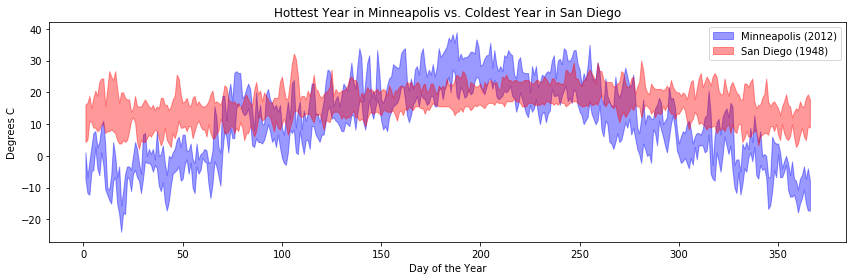

In [64]:
pp.figure(figsize=(12,4))
pp.fill_between(days_leapyear,selectyear(minneapolis_tmin,minneapolis_warmest[0]),selectyear(minneapolis_tmax,minneapolis_warmest[0]),label='Minneapolis ({})'.format(minneapolis_warmest[0]),color='b',alpha=0.4)
pp.fill_between(days_leapyear,selectyear(sandiego_tmin,sandiego_coldest[0]),selectyear(sandiego_tmax,sandiego_coldest[0]),label='San Diego ({})'.format(sandiego_coldest[0]),color='r',alpha=0.4)
pp.legend()
pp.xlabel('Day of the Year')
pp.ylabel('Degrees C')
pp.title('Hottest Year in Minneapolis vs. Coldest Year in San Diego')
pp.tight_layout()